# Financial Health Prediction Model Based on Personal Finance Records and Demographics

### Overview

#### Data Understanding

**About Dataset:**  
Dataset contains detailed financial and demographic data for 20,000 individuals in India, focusing on income, expenses, and potential savings across various categories. 

<table>
  <tr>
    <td><b>Parameter</td>
    <td><b>Description</td>
  </tr>
  <tr>
    <td>Income</td>
    <td>Monthly income in currency unit</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Age of the individual</td>
  </tr>
  <tr>
    <td>Dependents</td>
    <td>Number of dependents supported by the individual</td>
  </tr>
  <tr>
    <td>Occupation</td>
    <td>Type of employment or job role.</td>
  </tr>
  <tr>
    <td>City_Tier</td>
    <td>
    <ul>
    <li>Tier 1: Largest, most developed, and most densely populated cities.</li>
    <li>Tier 2: Mid-sized cities</li>
    <li>Tier 3: Small cities or towns with lower population densities and slower economic growth </li>
    </ul>
    </td>
  </tr>
  <tr>
    <td>Rent<br>Loan_Repayment<br>Insurance<br>Groceries<br>Transport<br>Eating_Out<br>Entertainment<br>Utilities<br>Healthcare<br>Education<br>Miscellaneous</td>
    <td>Monthly Expenses Records
    <br>
    <br>Miscellaneous: Generally refers to expenses that don’t fit neatly into other specific categories, including:
    <ul>
    <li><ins>Unexpected or Infrequent Purchases</ins>: Like a one-time purchase or small repairs.</li>
    <li><ins>Personal Items or Discretionary Spending </ins>: Small items such as magazines, gifts, or occasional treats.</li>
    <li><ins>Random Fees or Minor Charges</ins>: Small service fees or occasional bank charges.</li>
    </ul>
    </td>
  </tr>
  <tr>
    <td>Desired_Saving_Percentage<br>Desired_Savings</td>
    <td>Targets for monthly saving</td>
  </tr>
  <tr>
    <td>Disposable_Income</td>
    <td>Income remaining after all expenses are accounted for</td>
  </tr>
  <tr>
    <td>Potential_Savings_Groceries<br>Potential_Savings_Transport<br>Potential_Savings_Eating_Out<br>Potential_Savings_Entertainment<br>Potential_Savings_Utilities<br>Potential_Savings_Healthcare<br>Potential_Savings_Education<br>Potential_Savings_Miscellaneous</td>
    <td>Includes estimates of potential savings across different spending areas
    <br>(These columns are not relevant to the project)
    </td>
  </tr>
</table>

#### Project Objectives

**Background**:  
Financial health is a term used to describe the state of one's personal monetary affairs.

**Approach**:
- Calculating "Finacial Point" through Financial Scoring System
    - Budget Adherence: Monthly expenses stays within income amount (1 point)
    - Essential vs. Discreationary Spending: Ideally, no more than 30% of income should go toward discretionary expenses (`Entertainent`, `Eating_Out` and 35% of `Miscellaneous`). (1 point)  
    - Saving Rate: (We assume that 65% of `Disposable_Income` value would be the Actual Saving amount)
        - if the Actual Saving amount satisfied the `Desired_Saving` (0.5 point)
        - if the Actual Saving amount is about 15%-20% of income (1 point)
    - Debt Management: DTI Ratio (Debt-to-Income Ratio) below 36% of income (1 point)

- Add a lable to determine personal financial health based on "Financial Point"
    - (4 - 4,5]: Good Financial Health (2)
    - (3 - 3.5]: Average Financial Health (1)
    - <3: Vulnerable Financial Health (0)

- Building model 

- Evaluating model
    

### Libraries 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## 0. Loading Data
- Reading data from csv file into DataFrame
- Dropping irrelevant columns 

In [135]:
# Read data from csv file into DataFrame
df = pd.read_csv('data.csv')

df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [137]:
# Drop irrelevant columns
df.drop(['Desired_Savings_Percentage', 
         'Potential_Savings_Groceries',
         'Potential_Savings_Transport',
         'Potential_Savings_Eating_Out',
         'Potential_Savings_Entertainment',
         'Potential_Savings_Utilities',
         'Potential_Savings_Healthcare',
         'Potential_Savings_Education',
         'Potential_Savings_Miscellaneous'], axis=1, inplace=True)

In [138]:
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Education,Miscellaneous,Desired_Savings,Disposable_Income
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,1651.801726,1536.184255,2911.792231,1546.914539,0.000000,831.525120,6200.537192,11265.627707
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,649.378103,1050.241738,1626.143346,1137.351325,1551.723167,564.235007,1923.176434,9676.818733
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,1513.814376,1723.306926,3368.457108,2178.515847,3160.026299,628.371220,7050.360422,13891.450624
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,5040.249158,2858.194240,6128.550387,4571.118217,0.000000,2526.055712,16694.965136,31617.953615
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,692.827225,660.186852,1092.689024,1169.095816,1445.215694,515.510300,1874.099434,6265.700532


## 1. Data Wragling
- Handling with Missing Values  
    &rarr; This data do not contain missing values
- Formatting Data
- Normalizing Data
- Binning Data: Binning `Age` into `Age_Group`

In [139]:
# Checking for null value

df.isnull().sum()

Income               0
Age                  0
Dependents           0
Occupation           0
City_Tier            0
Rent                 0
Loan_Repayment       0
Insurance            0
Groceries            0
Transport            0
Eating_Out           0
Entertainment        0
Utilities            0
Healthcare           0
Education            0
Miscellaneous        0
Desired_Savings      0
Disposable_Income    0
dtype: int64

&rarr; There is no missing value in this dataset

In [140]:
# Checking for datatypes

df.dtypes

Income               float64
Age                    int64
Dependents             int64
Occupation            object
City_Tier             object
Rent                 float64
Loan_Repayment       float64
Insurance            float64
Groceries            float64
Transport            float64
Eating_Out           float64
Entertainment        float64
Utilities            float64
Healthcare           float64
Education            float64
Miscellaneous        float64
Desired_Savings      float64
Disposable_Income    float64
dtype: object

&rarr; Columns are in the right data type. 

**Binning Age into AgeGroup**

Text(0.5, 1.0, 'Age Distribution')

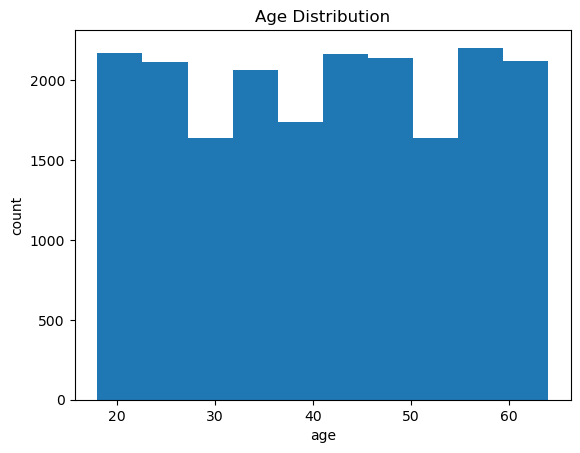

In [141]:
%matplotlib inline

plt.hist(df["Age"])

# set x/y labels and plot title
plt.xlabel("age")
plt.ylabel("count")
plt.title("Age Distribution")

We specify the range of age group as:
- younger: 18 to 35 y/o
- middle-aged: 36 to 55 y/o
- senior: 55 and older

In [142]:
age_group = np.array([18, 35, 55, max(df['Age'])])
age_group_labels=['younger', 'middle-aged', 'senior']

df['Age_Group'] = pd.cut(df['Age'], age_group, labels=age_group_labels, include_lowest=True )
df[['Age','Age_Group']].head()

,Age,Age_Group
0,49,middle-aged
1,34,younger
2,35,younger
3,21,younger
4,52,middle-aged


In [143]:
df['Age_Group'].value_counts(sort=False)

Age_Group
younger        7602
middle-aged    8519
senior         3879
Name: count, dtype: int64

Text(0.5, 1.0, 'Age Group Distribution')

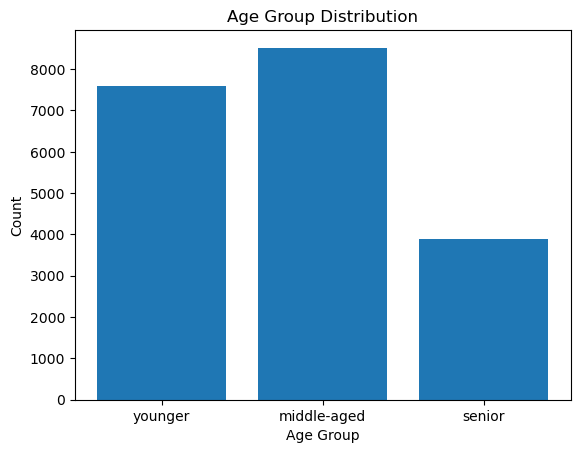

In [144]:
%matplotlib inline

plt.bar(age_group_labels, df["Age_Group"].value_counts(sort=False))

# set x/y labels and plot title
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Age Group Distribution")

## 2. Data Preprocessing 
- Feature Engineering: 
    - Create `Neccessary_Expense` feature (including <ins>Rent</ins>, <ins>Insurance</ins>, <ins>Groceries</ins>, <ins>Transport</ins>, <ins>Utilities</ins>, <ins>Healthcare</ins>, <ins>Education</ins> and 65% of <ins>Miscellaneous</ins>)
    - Create `Discretionary_Expenses` feature (including <ins>Entertainment</ins>, <ins>Eating_Out</ins> and 35% of <ins>Miscellaneous</ins>)
    - Create feature `Fin_Point` and `Fin_Health` based on criteria mentioned in **Project Objectives** section.
- Encoding Categorical Variables:
    - Use <ins>One-hot Encoding</ins> for `City_Tier`

In [53]:
def expense_category_neccessary(df):
    neccessary = ['Rent', 'Insurance', 'Groceries', 'Transport', 'Utilities', 'Healthcare', 'Education']
    return sum(df[neccessary]) 

In [54]:
def expense_category_discreationary(df):
    discretionary = ['Entertainment', 'Eating_Out']
    return sum(df[discretionary])

In [55]:
def financial_point(df):
    point = 0
    # Budget Adherence
    if df['Disposable_Income'] > 0: 
        point +=1
    # Expense Management
    ## Note: We assume that 35% of Miscellaneous expense would go toward Discretionary expense
    if df['Discretionary_Expense'] < df['Income']*0.3:
        point +=1
    # Saving Rate
    ## Note: We assume that 65% of Disposable Income would be the Actual Saving amount
    if 0.65*df['Disposable_Income'] >= df['Desired_Savings']:
        point+=0.5
    if 0.65*df['Disposable_Income'] >= 0.20*df['Income']:
        point += 1
    # Debt Management 
    if (df['Loan_Repayment']/df['Income']) < 0.36:
        point += 1
    return point

In [56]:
def fin_health_category(df):

    if df['Fin_Point'] >= 4:
        fin_health = 2
    elif df['Fin_Point'] >= 3:
        fin_health = 1
    elif df['Fin_Point'] < 3:
        fin_health = 0
    
    return fin_health

In [57]:
need = df.apply(expense_category_neccessary, axis=1)
df['Neccessary_Expense'] = need

In [58]:
disc = df.apply(expense_category_discreationary, axis=1)
df['Discretionary_Expense'] = disc

In [59]:
fin_point = df.apply(financial_point, axis=1)
df['Fin_Point'] = fin_point
df['Fin_Point'].value_counts()

Fin_Point
3.5    9761
4.5    6541
3.0    3470
4.0     116
2.0     112
Name: count, dtype: int64

In [60]:
fin_health = df.apply(fin_health_category, axis=1)
df['Fin_Health'] = fin_health
df['Fin_Health'].value_counts()


Fin_Health
1    13231
2     6657
0      112
Name: count, dtype: int64

In [145]:
df = pd.get_dummies(df, columns=['City_Tier'], prefix='encoded', dtype=int)

In [146]:
df.head()

,Income,Age,Dependents,Occupation,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,...,Utilities,Healthcare,Education,Miscellaneous,Desired_Savings,Disposable_Income,Age_Group,encoded_Tier_1,encoded_Tier_2,encoded_Tier_3
0,44637.249636,49,0,Self_Employed,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,1651.801726,...,2911.792231,1546.914539,0.000000,831.525120,6200.537192,11265.627707,middle-aged,1,0,0
1,26858.596592,34,2,Retired,5371.719318,0.000000,869.522617,2818.444460,1543.018778,649.378103,...,1626.143346,1137.351325,1551.723167,564.235007,1923.176434,9676.818733,younger,0,1,0
2,50367.605084,35,1,Student,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,1513.814376,...,3368.457108,2178.515847,3160.026299,628.371220,7050.360422,13891.450624,younger,0,0,1
3,101455.600247,21,0,Self_Employed,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,5040.249158,...,6128.550387,4571.118217,0.000000,2526.055712,16694.965136,31617.953615,younger,0,0,1
4,24875.283548,52,4,Professional,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,692.827225,...,1092.689024,1169.095816,1445.215694,515.510300,1874.099434,6265.700532,middle-aged,0,1,0


## 3. Exploratory Data Analysis
- Descriptive Statistic
- GroupBy
- Visualizating Data
- Determine Correlations
    1. Age and Income do not have indentifiable correlation. 
    2. Income and Occupation: Income distribution between 4 type of Occupation are almost identical
    2. Is spending habit varied through age?

In [61]:
# Descriptive Statistic Table

df.describe().round(2)

,Income,Age,Dependents,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,...,Utilities,Healthcare,Education,Miscellaneous,Desired_Savings,Disposable_Income,Neccessary_Expense,Discretionary_Expense,Fin_Point,Fin_Health
count,20000.00,20000.00,20000.00,20000.0,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,...,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,41585.50,41.03,2.00,1.9,9115.49,2049.80,1455.03,5205.67,2704.47,1461.86,...,2504.98,1663.08,2498.35,830.55,4982.88,10647.37,25147.06,2910.71,3.73,1.33
std,40014.54,13.58,1.42,0.7,9254.23,4281.79,1492.94,5035.95,2666.35,1481.66,...,2522.98,1628.16,3098.44,845.02,7733.47,11740.64,24499.94,2887.24,0.57,0.48
min,1301.19,18.00,0.00,1.0,235.37,0.00,30.00,154.08,81.23,39.44,...,75.43,53.50,0.00,20.50,0.00,-5400.79,788.99,93.13,2.00,0.00
25%,17604.88,29.00,1.00,1.0,3649.42,0.00,580.20,2165.43,1124.58,581.01,...,1017.67,684.36,611.68,323.63,1224.93,3774.89,10478.42,1193.98,3.50,1.00
50%,30185.38,41.00,2.00,2.0,6402.75,0.00,1017.12,3741.09,1933.85,1029.11,...,1766.47,1189.20,1701.90,579.08,2155.36,7224.89,18120.47,2085.89,3.50,1.00
75%,51765.45,53.00,3.00,2.0,11263.94,2627.14,1787.16,6470.89,3360.60,1807.08,...,3103.72,2057.08,3311.71,1025.20,6216.31,13331.95,31138.25,3590.97,4.50,2.00
max,1079728.37,64.00,4.00,3.0,215945.67,123080.68,38734.93,119816.90,81861.50,34406.10,...,53725.44,36001.53,81665.09,15856.36,245504.49,377060.22,625181.82,62510.11,4.50,2.00


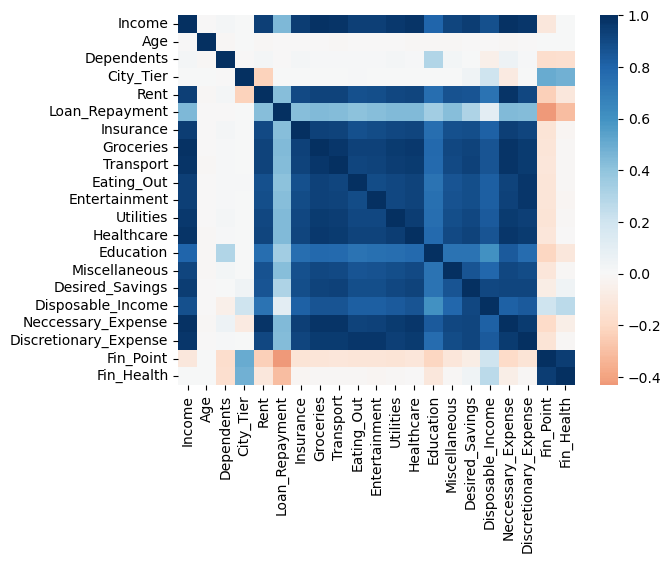

In [62]:
heatplot = sns.heatmap(df.corr(numeric_only=True), cmap='RdBu', center=0)

Looking into this correlation heatmap, there are some interesting insights that we can explore deeper:
- `Age` have no correlation with any other variables.
- `City_Tier` have negative correlation with `Rent` (Remember the most densely populated type of city have tier 1, meaning that the larger the city, the higher the rent fee would be)
- Consequentially, while `Rent` have negative impact on `Fin_Health`, `City_Tier` have a positive correlation with 'Fin_Health`
- `Dependents` column have negative correlation with `Fin_Health`

##### 1. Age, Income and Occupation: Have no identifiable correlation
In this correlation heatmap, we can see that `Age` and `Income` have no correlation. But it is more reasonable to think that `Age` and `Income` should have a positive linear relationship, isn't it? 

In [222]:
print(df['Income'].min())
print(df['Income'].max())

1301.1873325549093
1079728.3735172302


We can see that between the lowest and highest `Income` value in the dataset have a significantly wide gap

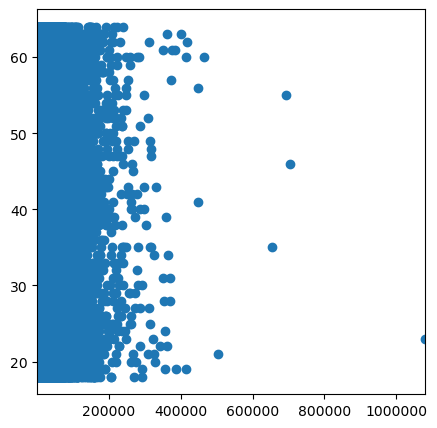

In [37]:
# Ploting Scatter Plot of Age and Incom
y = df['Age']
x = df['Income']
plt.subplots(figsize=(5,5))
plt.scatter(x,y)
plt.xlim(df['Income'].min(), df['Income'].max())
plt.ticklabel_format(style='plain', axis='x')

&rarr; **Conclusion:** The income amounts of all age are almost identical and indistinguishable

In [236]:
df['Occupation'].value_counts()

Occupation
Retired          5019
Professional     5011
Student          5003
Self_Employed    4967
Name: count, dtype: int64

C:\Users\aDMIN\AppData\Local\Temp\ipykernel_28244\2829941571.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Retired Income Boxplot', 'Student Income Boxplot',


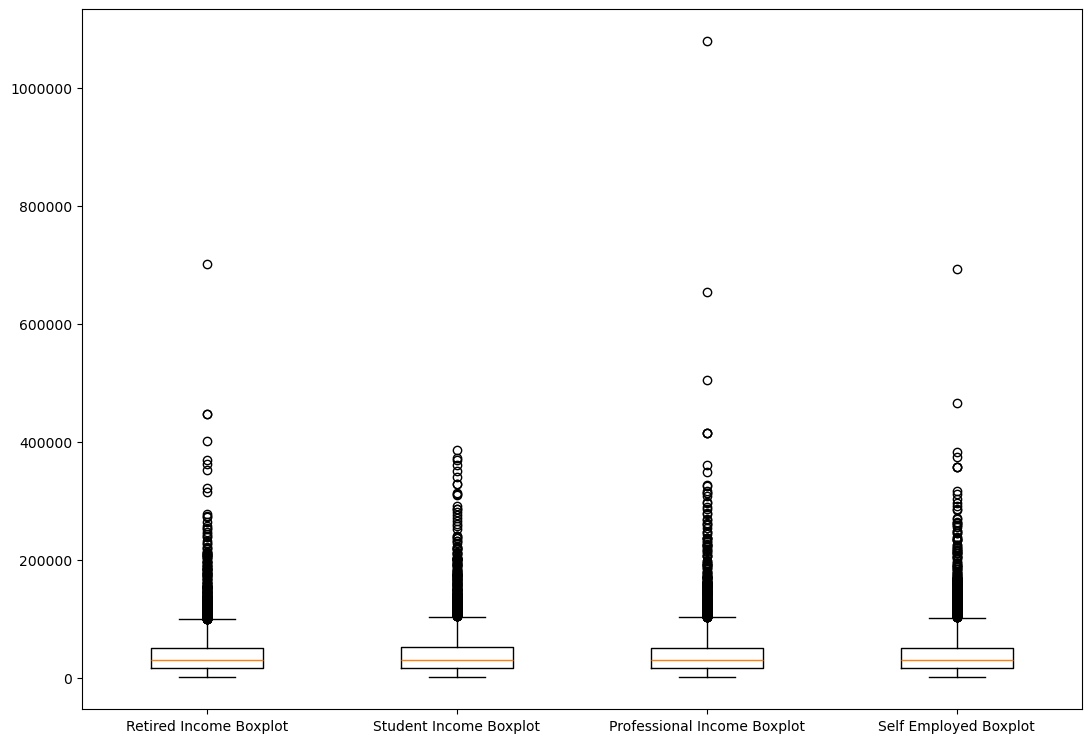

In [265]:
# Ploting Occupation Income Boxplot

retired_box = df['Income'].loc[df['Occupation']=='Retired']
student_box = df['Income'].loc[df['Occupation']=='Student']
professional_box = df['Income'].loc[df['Occupation']=='Professional']
self_employed_box = df['Income'].loc[df['Occupation']=='Self_Employed']
data = [retired_box, student_box, professional_box, self_employed_box]

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['Retired Income Boxplot', 'Student Income Boxplot', 
                    'Professional Income Boxplot', 'Self Employed Boxplot'])

# Creating plot
bp = ax.boxplot(data)

# show plot

plt.ticklabel_format(style='plain', axis='y')
plt.show()

&rarr; **Conclusion**: `Income` distributions are almost identical between 4 types of `Occupation`

##### 3. City Tier and Occupation Distribution

In [66]:
city_occ_grp_df = df[['City_Tier', 'Occupation']]

city_occ_grp_df = city_occ_grp_df.groupby(['City_Tier', 'Occupation'], as_index=False).size()
city_occ_grp_df.rename(columns={'size':'Count'}, inplace=True)

city_occ_grp_df

,City_Tier,Occupation,Count
0,1,Professional,1489
1,1,Retired,1505
2,1,Self_Employed,1473
3,1,Student,1467
4,2,Professional,2499
5,2,Retired,2513
6,2,Self_Employed,2515
7,2,Student,2541
8,3,Professional,1023
9,3,Retired,1001


In [67]:
city_occ_grouped_pivot = city_occ.pivot(index='City_Tier',columns='Occupation')

city_occ_grouped_pivot

Count                              
Occupation Professional Retired Self_Employed Student
City_Tier                                            
1                  1489    1505          1473    1467
2                  2499    2513          2515    2541
3                  1023    1001           979     995

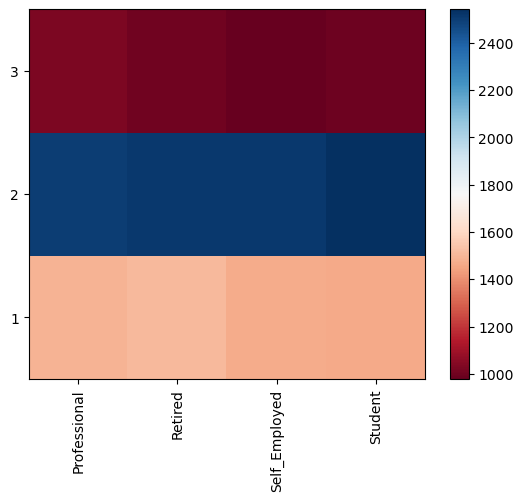

In [68]:
fig, ax = plt.subplots()
im = ax.pcolor(city_occ_grouped_pivot, cmap='RdBu')

#label names
row_labels = city_occ_grouped_pivot.columns.levels[1]
col_labels = city_occ_grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(city_occ_grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(city_occ_grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

##### City Tier and Rent

We know that `Rent` affect badly to `Fin_Health`, but does `Rent` varied through `City_Tier`?

In [69]:
city_rent_grp_df = df[['City_Tier', 'Rent']]
city_rent_grp_df = city_rent_grp_df.groupby(['City_Tier'], as_index=False).mean()

city_rent_grp_df

,City_Tier,Rent
0,1,12320.517019
1,2,8342.642141
2,3,6304.708231


##### 3. Spending Habit between Age_Group

In [35]:
younger_df = df.loc[df['Age_Group']=='younger']
middle_age_df = df.loc[df['Age_Group']=='middle-aged']
senior_df = df.loc[df['Age_Group']=='senior']

print(younger_df['Discretionary_Expense'].median())
print(middle_age_df['Discretionary_Expense'].median())
print(senior_df['Discretionary_Expense'].median())

print(younger_df['Neccessary_Expense'].median())
print(middle_age_df['Neccessary_Expense'].median())
print(senior_df['Neccessary_Expense'].median())

2077.983321307548
2094.2687945410844
2080.8118629711553
17931.52155119037
18231.46017317046
18259.57573480435


## 3. Model Development 

## 4. Model Evaluation 